# Graph Algorithms
in this notebook we analyze graph's algorithms:

    connected_components
    prim_algorithm

[(2, 17), (5, 11), (7, 58), (9, 94), (10, 5), (11, 48), (12, 39), (13, 23), (14, 90), (15, 68), (16, 70), (17, 76), (21, 1), (22, 33), (23, 45), (24, 59), (25, 26), (26, 37), (27, 8), (28, 3), (29, 7), (30, 55), (31, 91), (32, 81), (33, 24), (34, 63), (35, 58), (36, 44), (37, 38), (38, 27), (39, 79), (41, 18), (42, 1), (43, 40), (44, 4), (45, 36), (46, 8), (47, 85), (48, 35), (49, 19), (50, 62), (51, 29), (53, 75), (54, 43), (55, 13), (56, 69), (57, 88), (58, 2), (59, 67), (60, 47), (61, 28), (62, 84), (63, 97), (64, 13), (65, 80), (66, 6), (67, 30), (68, 10), (69, 8), (70, 63), (71, 78), (72, 9), (73, 0), (74, 87), (75, 65), (76, 42), (77, 11), (78, 89), (79, 93), (80, 41), (81, 73), (82, 43), (83, 72), (84, 22), (85, 54), (86, 49), (87, 95), (88, 52), (89, 20), (90, 98), (91, 53), (92, 90), (93, 72), (94, 87), (95, 0), (96, 66), (97, 96), (98, 4), (99, 16)]


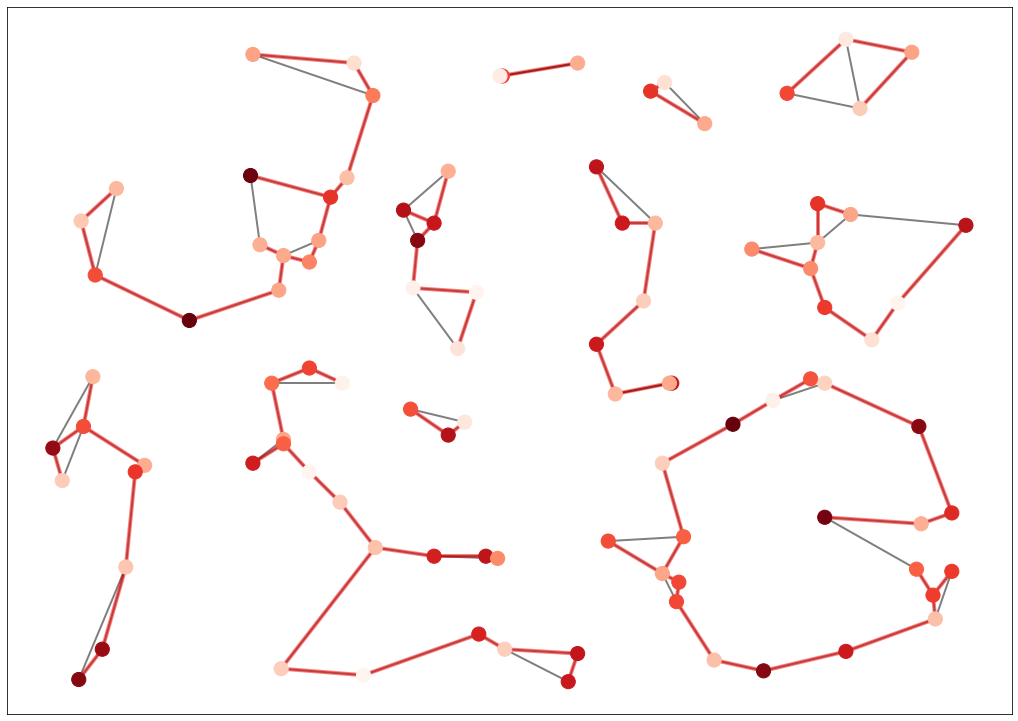

In [6]:
import os, sys
sys.path = [os.path.abspath("../")] + sys.path
from graph import (
    RandomGraph,
    mst_prim
)
from utils import (
    np
)
import networkx as nx

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import lines

def show_graph(graph_data, node_colors=None,tree=None):
    G = nx.Graph(graph_data['graph_dict'])
    node_colors = node_colors or graph_data['node_colors']
    node_positions = graph_data['node_positions']
    node_label_pos = graph_data['node_label_positions']
    edge_weights = graph_data['edge_weights']

    # set the size of the plot
    plt.figure(figsize=(18, 13))
    # draw the graph (both nodes and edges) with locations from graph_locations
    pos = {k: node_positions[k] for k in G.nodes()}
    
    
    #node_colors = [node_colors[node] for node in G.nodes()]
    node_colors = [np.random.randint(100) for _ in G.nodes()]
    nx.draw_networkx_nodes(G, pos,
            node_color=node_colors,cmap=plt.cm.Reds_r,node_size=200)
    edge_color = '#A0CBE2'
    nx.draw_networkx_edges(G, pos, edge_cmap=plt.cm.Blues,width=2, alpha=0.5)
    #nx.draw(G, pos={k: node_positions[k] for k in G.nodes()},
     #       node_color=[node_colors[node] for node in G.nodes()], linewidths=0.3, edgecolors='k')
    if tree:
        #edgelist = [[node_positions[k],node_positions[v]] for k,v in tree]
        nx.draw_networkx_edges(G, pos,edge_cmap=plt.cm.Reds,
                       edgelist=tree,
                       width=4, alpha=0.5, edge_color='red')
    # draw labels for nodes
    #node_label_handles = nx.draw_networkx_labels(G, pos=node_label_pos, font_size=9,color='red')

    # add a white bounding box behind the node labels
    #[label.set_bbox(dict(facecolor='white', edgecolor='none')) for label in node_label_handles.values()]

    # add edge lables to the graph
    #nx.draw_networkx_edge_labels(G, pos=node_positions, edge_labels=edge_weights, font_size=9)

    # add a legend
    #white_circle = lines.Line2D([], [], color="white", marker='o', markersize=15, markerfacecolor="white")
    #orange_circle = lines.Line2D([], [], color="orange", marker='o', markersize=15, markerfacecolor="orange")
    #red_circle = lines.Line2D([], [], color="red", marker='o', markersize=15, markerfacecolor="red")
    #gray_circle = lines.Line2D([], [], color="gray", marker='o', markersize=15, markerfacecolor="gray")
    #green_circle = lines.Line2D([], [], color="green", marker='o', markersize=15, markerfacecolor="green")
    #plt.legend((white_circle, orange_circle, red_circle, gray_circle, green_circle),
    #           ('Un-explored', 'Frontier', 'Currently Exploring', 'Explored', 'Final Solution'),
    #           numpoints=1, prop={'size': 16}, loc=(.8, .75))

    # show the plot. No need to use in notebooks. nx.draw will show the graph itself.
    #plt.show()
    
np.random.seed(31415)
graph = RandomGraph(list(np.arange(100)))
# node colors, node positions and node label positions
node_colors = {}
#for node in graph.graph_dict.keys():
#    node_colors[node] = 'white'
mst = mst_prim(graph, graph.nodes()[0])

#node_colors = {node: 'white' for node in graph.locations.keys()}
node_positions = graph.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in graph.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in graph.graph_dict.items() for k2, v2 in v.items()}

graph_graph_data = {  'graph_dict' : graph.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }

tree = []
for node in mst:
    if mst[node] is not None:
        tree.append((node,mst[node]))
print(tree)
show_graph(graph_graph_data,tree=tree)


In [6]:
#connected components
import os, sys
sys.path = [os.path.abspath("../")] + sys.path

from utils import (
    np
)
from graph import(
    connected_components,
    RandomGraph
)
np.random.seed(31415)
graph = RandomGraph(list(np.arange(100)))
c_cs = connected_components(graph)
print(c_cs)
print("Number of connected components: {}".format(len(c_cs)))


[[0, 73, 95, 32, 81, 87, 9, 72, 74, 93, 94, 79, 83, 39, 12], [1, 42, 76, 21, 17, 2, 58, 35, 7, 48, 51, 29, 11, 5, 77, 10, 68, 15], [3, 28, 61], [4, 98, 44, 14, 90, 36, 45, 23, 92, 13, 55, 30, 64, 50, 67, 59, 62, 33, 84, 22, 24], [6, 66, 99, 70, 63, 96, 16, 34, 97], [8, 69, 56, 27, 46, 38, 37, 25, 26], [18, 80, 41, 65, 75, 53, 31, 91], [19, 86, 49], [20, 71, 89, 78], [40, 82, 43, 54, 85, 47, 60], [52, 88, 57]]
Number of connected components: 11


There are 11 connected components.

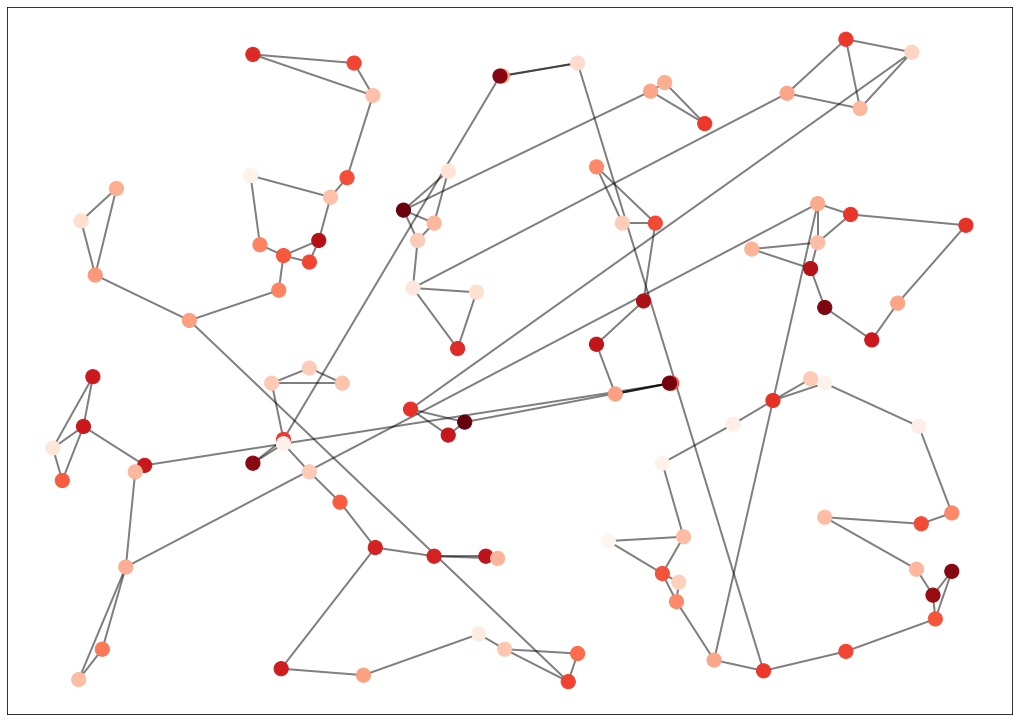

In [9]:
# First run the above cells
# or it will doesn't work
#
from graph import(
    ConnectedGraph
)
np.random.seed(31415)
graph = ConnectedGraph(list(np.arange(100)))

node_positions = graph.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in graph.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in graph.graph_dict.items() for k2, v2 in v.items()}

graph_graph_data = {  'graph_dict' : graph.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights,
                     }
show_graph(graph_graph_data)
